# PREDICTING PROJECT ENGAGEMENT BY CATEGORY

### Problem Statement:
Does the category that the project and challenge are launched in affect engagement? In effect: do certain categories garner more attention and engagement than others?

### Hypothesis:
The category that a project is launched in does affect category and the category that will have the highest engagement

## Import Final Project Cleaned Data set

In an effort to keep this notebook legible, I have separated out the dataset importing, cleaning and merging into a different notebook which can be found here: 
### LINK

In [253]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [254]:
#import final project csv
activity_path = './assets/datasets/final_project_cleaned.csv'
user_activity = pd.read_csv(activity_path)

In [255]:
#Drop the additonal index that got brought in as a column when importing the final project cleaned csv
user_activity.drop('Unnamed: 0', axis='columns', inplace=True)

In [256]:
#Change the `user_id` column to an integer not a float
user_activity.loc[:, 'user_id'] = user_activity.loc[:, 'user_id'].astype(int)

In [257]:
user_activity.head()

,cocreation_tool,project_id,user_id,content_type_name_entry,content_type_name_post,parent_content_type_name,post_count,topic_count,view_count,watch_count,participants,title,categories,follow,watch
0,brainstorm,155,1439,0,0,project,1586,27,6116,482,503,"Olli: self-driving, cognitive electric shuttle",Ground Mobility,0,0
1,brainstorm,155,75774,0,0,project,1586,27,6116,482,503,"Olli: self-driving, cognitive electric shuttle",Ground Mobility,0,0
2,brainstorm,155,10,0,0,project,1586,27,6116,482,503,"Olli: self-driving, cognitive electric shuttle",Ground Mobility,0,0
3,brainstorm,155,1439,0,0,project,1586,27,6116,482,503,"Olli: self-driving, cognitive electric shuttle",Ground Mobility,0,0
4,brainstorm,155,1439,0,0,project,1586,27,6116,482,503,"Olli: self-driving, cognitive electric shuttle",Ground Mobility,0,0


## Feature Engineering

`post count`, `topic_count`, `view_count`, `watch_count`, and `participants` are all vestgises and numbers from the original datasets which had 3mil+ rows but since I am using just a sample of that, I will get rid of these and grab the numbers that are specific to this sample set.

In [258]:
activity = user_activity.drop(['post_count', 'topic_count', 'view_count', 'watch_count', 'participants'], axis='columns')

In [259]:
activity.head()

,cocreation_tool,project_id,user_id,content_type_name_entry,content_type_name_post,parent_content_type_name,title,categories,follow,watch
0,brainstorm,155,1439,0,0,project,"Olli: self-driving, cognitive electric shuttle",Ground Mobility,0,0
1,brainstorm,155,75774,0,0,project,"Olli: self-driving, cognitive electric shuttle",Ground Mobility,0,0
2,brainstorm,155,10,0,0,project,"Olli: self-driving, cognitive electric shuttle",Ground Mobility,0,0
3,brainstorm,155,1439,0,0,project,"Olli: self-driving, cognitive electric shuttle",Ground Mobility,0,0
4,brainstorm,155,1439,0,0,project,"Olli: self-driving, cognitive electric shuttle",Ground Mobility,0,0


Create a column for total watches, total follows, total entries and total posts per project

In [318]:
#Grabbing the total counts by project id and assigning it to a new DF
all_counts = activity.groupby('project_id').sum()
df_counts = pd.DataFrame(data = all_counts, dtype=np.int64)
df_counts.reset_index(inplace=True)
df_counts.head()

,project_id,user_id,content_type_name_entry,content_type_name_post,follow,watch
0,136,208967,0,2,0,0
1,137,172857,0,2,0,1
2,138,810666,0,12,0,2
3,143,5144246,0,104,0,0
4,149,1644125,0,13,5,0


In [261]:
#Cleaning up the new df by dropping uneeded items and renaming the columns to names that make sense
df_counts.drop('user_id', axis='columns', inplace=True)
df_counts.rename(columns={'content_type_name_entry': 'entry_count', 'content_type_name_post': 'post_count', 'follow': 'follow_count', 'watch': 'watch_count'}, inplace=True)
df_counts.head()

,project_id,entry_count,post_count,follow_count,watch_count
0,136,0,2,0,0
1,137,0,2,0,1
2,138,0,12,0,2
3,143,0,104,0,0
4,149,0,13,5,0


In [262]:
#Merging the engagement count metrics with the original df to add the metrics on as new columns
activity_count = pd.merge(activity, df_counts, how='left', on='project_id')

Create a column for total ideas posted to brainstorms w/in a project. The `content_type_name_idea` column is the one I dropped when doing the pd.get_dummies(). So this count will take a bit more finesse 

In [263]:
#Filtering the content_type_name columns by looking for the content_type_name_entry and 
#content_type_name_post rows that are 0
idea_filter = (activity_count.loc[:, 'content_type_name_entry'] == 0) & (activity_count.loc[:, 'content_type_name_post'] == 0)
ideas = activity_count.loc[idea_filter, :]

In [264]:
#Using the filter created above to get the value counts of how many ideas there were per project
#and then assigning that to a df 
idea_count = ideas.loc[:, 'project_id'].value_counts()
counts = pd.DataFrame(idea_count)
counts = counts.reset_index()
counts.rename(columns={'index': 'project_id', 'project_id': 'idea_count'}, inplace=True)
counts

,project_id,idea_count
0,271,145
1,268,81
2,290,80
3,311,68
4,266,66
5,280,49
6,209,39
7,293,24
8,322,22
9,275,22


In [265]:
#Merging the idea df I created above into the initial df as an idea count column
activity_count = pd.merge(activity_count, counts, how='left', on='project_id')

In [266]:
#now that the count numbers for ideas per project are in there, all the NaN values within that column are 
#projects that there were no ideas so I can fill those cells with 0
activity_count.loc[:, 'idea_count'].isnull().sum()

16909

In [267]:
#checking for null values in the `idea_count` column
activity_count.loc[:, 'idea_count'].fillna(0, inplace=True)
activity_count.loc[:, 'idea_count'].isnull().sum()

0

In [268]:
#I can also see that the idea count came in as a float so that needs to be changed
activity_count.loc[:, 'idea_count'] = activity_count.loc[:, 'idea_count'].astype(int)

Now I want to know and be able to plot average user activity cross-project. So I am going to create a columns for average activity per user on each project as well as total activities (ideas, posts, entries, watches and follows) per project.

In [269]:
#I'm going to start with the project sums of total actions taken on each project and assigning that to a df
project_sum = activity_count.groupby('project_id').sum()
project_sum['total_count'] = project_sum['entry_count'] + project_sum['post_count'] + project_sum['follow_count'] + project_sum['watch_count'] + project_sum['idea_count']

In [270]:
#resetting the index of the newly created df and renaming column names to ones that make sense
project_sum.reset_index(inplace=True)
project_sum = project_sum.loc[:, ['project_id', 'total_count']]

In [271]:
#merging the total count df into the initial df
activity_count = pd.merge(activity_count, project_sum, how='left', on='project_id')

In [273]:
#dropping duplicate columns and renaming columns to names that make sense
activity_count.drop('total_count_y', axis='columns', inplace=True)
activity_count = activity_count.rename(columns={'total_count_x': 'total_count'})

In [274]:
#Get total participants in a project by getting total number of user_id's in a project
#Assigning the count to a df
#Merging the total user df into the initial df as a new column
total_users = activity_count.groupby('project_id')['user_id'].nunique()
participants = pd.DataFrame(total_users)
participants.reset_index(inplace=True)
participants.rename(columns={'user_id': 'total_users'}, inplace=True)
activity_count = pd.merge(activity_count, participants, how='left', on='project_id')

In [275]:
#Seeing how many unique categories are included in the categories column
activity_count.loc[:, 'categories'].unique()

array(['Ground Mobility', 'Industrial Inspection and Monitoring',
       'Architecture and Construction', 'Mars', 'Consumer Products',
       'Adaptive Sports', ' Air Mobility', 'Health and Wellness',
       'Infrastructure and Energy', 'Air Mobility'], dtype=object)

In [276]:
#Looking at total activities (or engagement) in categories
activity_count.groupby('categories')['total_count'].unique()

categories
 Air Mobility                                                         [49231224, 4948096]
Adaptive Sports                                                 [94192, 1775472, 3799955]
Air Mobility                                                          [4, 363605, 168, 6]
Architecture and Construction                                                    [286738]
Consumer Products                                            [773384, 10816, 114921, 168]
Ground Mobility                         [19296, 546, 4329612, 94192, 27423748, 4923122...
Health and Wellness                                                               [50760]
Industrial Inspection and Monitoring    [36764, 20800, 275155, 54900, 3233, 151712, 13...
Infrastructure and Energy                                                [521900, 114921]
Mars                                     [323862, 28290, 70870, 283429230, 44384, 135168]
Name: total_count, dtype: object

In [277]:
#looking at the different project total counts within each category
activity_count.groupby('categories')['total_count'].value_counts()

categories                            total_count
 Air Mobility                         49231224        2898
                                      4948096          899
Adaptive Sports                       3799955         1663
                                      1775472         1128
                                      94192            116
Air Mobility                          363605           601
                                      168                6
                                      4                  2
                                      6                  2
Architecture and Construction         286738           467
Consumer Products                     773384           698
                                      114921           113
                                      10816             52
                                      168                6
Ground Mobility                       27423748        4183
                                      49231224        2898
      

In [278]:
#It looks like there is an "Air Mobility" and " Air Mobility" in the category column which needs to be fixed
category_mean = activity_count.groupby('categories')['total_count'].value_counts()
category_mean_df = pd.DataFrame(category_mean)
category_mean_df.index.set_names('category_activity_mean', level=1, inplace=True)
category_mean_df.reset_index(inplace=True)
category_mean_df.replace(' Air Mobility', 'Air Mobility', inplace=True)
category_mean_df.loc[:, 'categories'].unique()

array(['Air Mobility', 'Adaptive Sports', 'Architecture and Construction',
       'Consumer Products', 'Ground Mobility', 'Health and Wellness',
       'Industrial Inspection and Monitoring',
       'Infrastructure and Energy', 'Mars'], dtype=object)

In [279]:
#Now I'm going to grab the mean activity per category
category_mean_df.groupby('categories').mean()
category_mean_df.drop('total_count', axis='columns', inplace=True)
category_mean_df.reset_index(inplace=True)
category_mean_df.loc[:, 'category_activity_mean'] = category_mean_df.loc[:, 'category_activity_mean'].astype(int)

In [280]:
category_mean_df

,index,categories,category_activity_mean
0,0,Air Mobility,49231224
1,1,Air Mobility,4948096
2,2,Adaptive Sports,3799955
3,3,Adaptive Sports,1775472
4,4,Adaptive Sports,94192
5,5,Air Mobility,363605
6,6,Air Mobility,168
7,7,Air Mobility,4
8,8,Air Mobility,6
9,9,Architecture and Construction,286738


In [281]:
#Before merging this category_count column into the main DF I need to get rid of the 
#duplicates in the main DF `activit_count`
activity_count.loc[:, 'categories'].replace(' Air Mobility','Air Mobility', inplace=True)

In [282]:
#Making sure that there are not two 'Air Mobilitys' anymore
activity_count.loc[:, 'categories'].value_counts()

Mars                                    15129
Ground Mobility                         10325
Air Mobility                             4408
Adaptive Sports                          2907
Industrial Inspection and Monitoring     2077
Consumer Products                         869
Architecture and Construction             467
Infrastructure and Energy                 420
Health and Wellness                       188
Name: categories, dtype: int64

In [283]:
#Now that both dataframes don't have the duplicate "Air Mobility" values I can merge to add the category activity
#mean to my main dataframe `activity_count`
activity_count = pd.merge(activity_count, category_mean_df, how='left', on='categories')

In [284]:
#It looks like the category_activity_mean column went back to a float so I need to change it back to an int
activity_count.loc[:, 'category_activity_mean'] = activity_count.loc[:, 'category_activity_mean'].astype(int)

In [285]:
#Dropping the column named 'index'
activity_count.drop('index', axis='columns', inplace=True)

## Plotting

I will use plots to see correlation between features, look for colinearity and make visualize the best predictor features.

### Plot the distribution of each column
Looking at the distribution of each column by category 

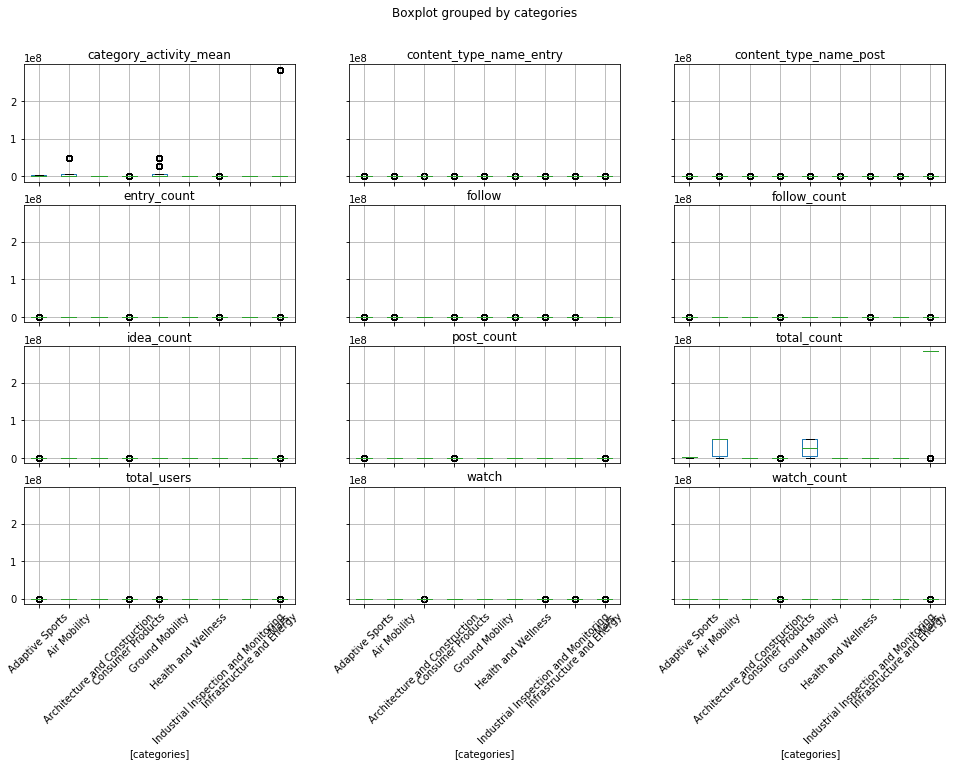

In [286]:
axes = activity_count.drop(['user_id', 'project_id'], axis=1).boxplot(by='categories', figsize=(16,10), rot=45)

This really doesn't tell me much.

### Compare metrics against each other
Compare total counts of different engagement metrics together to see if there are any correlations that pop out.

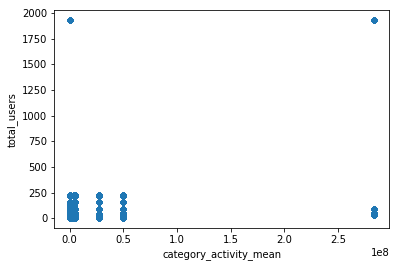

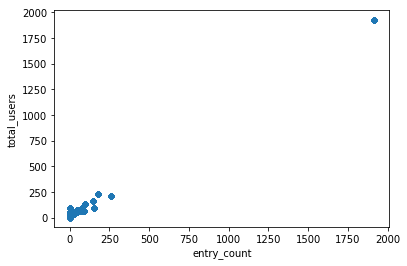

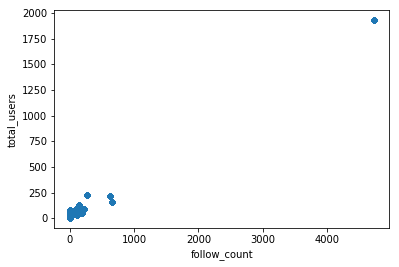

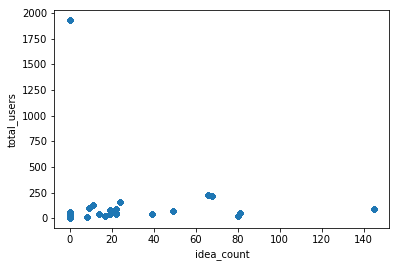

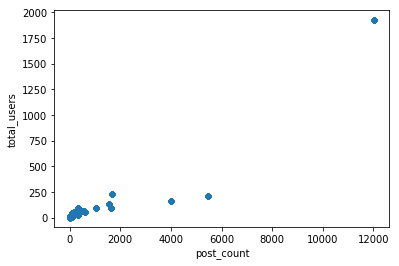

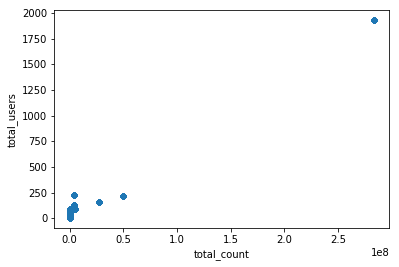

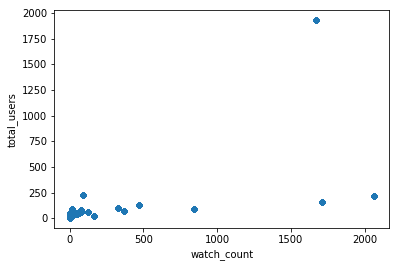

In [287]:
columns = ['category_activity_mean', 'entry_count', 'follow_count', 'idea_count', 'post_count', 'total_count', 'watch_count']

for x in columns:
    ax = activity_count.plot(kind='scatter', x=x, y='total_users')

All the engagement metrics seem to follow the same trend of just a couple of outliers with most values focused in a single area

In [288]:
#In order to be able to predict activity based on a category I will need to dummy code the category columns
activity_count = pd.get_dummies(activity_count, columns=['categories'])

In [289]:
activity_count.head()

,cocreation_tool,project_id,user_id,content_type_name_entry,content_type_name_post,parent_content_type_name,title,follow,watch,entry_count,...,category_activity_mean,categories_Adaptive Sports,categories_Air Mobility,categories_Architecture and Construction,categories_Consumer Products,categories_Ground Mobility,categories_Health and Wellness,categories_Industrial Inspection and Monitoring,categories_Infrastructure and Energy,categories_Mars
0,brainstorm,155,1439,0,0,project,"Olli: self-driving, cognitive electric shuttle",0,0,0,...,27423748,0,0,0,0,1,0,0,0,0
1,brainstorm,155,1439,0,0,project,"Olli: self-driving, cognitive electric shuttle",0,0,0,...,49231224,0,0,0,0,1,0,0,0,0
2,brainstorm,155,1439,0,0,project,"Olli: self-driving, cognitive electric shuttle",0,0,0,...,4329612,0,0,0,0,1,0,0,0,0
3,brainstorm,155,1439,0,0,project,"Olli: self-driving, cognitive electric shuttle",0,0,0,...,4948096,0,0,0,0,1,0,0,0,0
4,brainstorm,155,1439,0,0,project,"Olli: self-driving, cognitive electric shuttle",0,0,0,...,19296,0,0,0,0,1,0,0,0,0


### Correlation
Let's look at the correlation between features. Because of my columns I am assuming there will be high correlation between some

In [291]:
activity_count.corr()

,project_id,user_id,content_type_name_entry,content_type_name_post,follow,watch,entry_count,post_count,follow_count,watch_count,...,category_activity_mean,categories_Adaptive Sports,categories_Air Mobility,categories_Architecture and Construction,categories_Consumer Products,categories_Ground Mobility,categories_Health and Wellness,categories_Industrial Inspection and Monitoring,categories_Infrastructure and Energy,categories_Mars
project_id,1.000000,0.098527,-0.010783,0.043831,0.000620,0.226568,-0.051979,0.113009,-0.049230,0.553601,...,-0.019740,0.164983,0.115111,-0.022767,-0.066903,0.237495,0.000617,-0.440477,-0.034379,-0.123337
user_id,0.098527,1.000000,0.195385,-0.179460,0.218540,-0.034246,0.300254,0.300127,0.299677,0.183285,...,0.082623,0.002432,-0.050471,-0.011928,-0.012649,-0.208081,-0.004601,-0.092891,-0.020086,0.296159
content_type_name_entry,-0.010783,0.195385,1.000000,-0.894761,-0.001204,-0.079277,0.141696,0.121560,0.136849,0.017606,...,0.032076,-0.017167,-0.046896,-0.009577,0.000649,-0.091303,0.003907,0.014789,0.005528,0.120675
content_type_name_post,0.043831,-0.179460,-0.894761,1.000000,-0.003076,0.079588,-0.078757,-0.046368,-0.074483,0.057690,...,-0.023659,0.014443,0.052689,-0.013770,-0.015647,0.082419,-0.001842,-0.043430,-0.001396,-0.094264
follow,0.000620,0.218540,-0.001204,-0.003076,1.000000,-0.226475,0.240833,0.222412,0.246596,0.070491,...,0.086642,-0.052151,-0.104113,0.009789,-0.047121,-0.150857,-0.006404,-0.101120,-0.010377,0.304095
watch,0.226568,-0.034246,-0.079277,0.079588,-0.226475,1.000000,-0.188305,-0.129957,-0.181990,0.117896,...,-0.054435,0.030540,0.079641,-0.022217,0.054515,0.166659,0.005907,-0.064349,-0.012195,-0.207181
entry_count,-0.051979,0.300254,0.141696,-0.078757,0.240833,-0.188305,1.000000,0.957720,0.997508,0.419218,...,0.260240,-0.156699,-0.234786,-0.039455,-0.101363,-0.550841,-0.024621,-0.233687,-0.049005,0.923471
post_count,0.113009,0.300127,0.121560,-0.046368,0.222412,-0.129957,0.957720,1.000000,0.965068,0.656969,...,0.243832,-0.201720,-0.159604,-0.054713,-0.146617,-0.427708,-0.035966,-0.341321,-0.072183,0.840942
follow_count,-0.049230,0.299677,0.136849,-0.074483,0.246596,-0.181990,0.997508,0.965068,1.000000,0.448519,...,0.261685,-0.164983,-0.247344,-0.037452,-0.108891,-0.533553,-0.025311,-0.246183,-0.051840,0.926001
watch_count,0.553601,0.183285,0.017606,0.057690,0.070491,0.117896,0.419218,0.656969,0.448519,1.000000,...,0.090881,-0.233869,0.108427,-0.076381,-0.163145,0.070349,-0.046519,-0.455096,-0.096110,0.249144


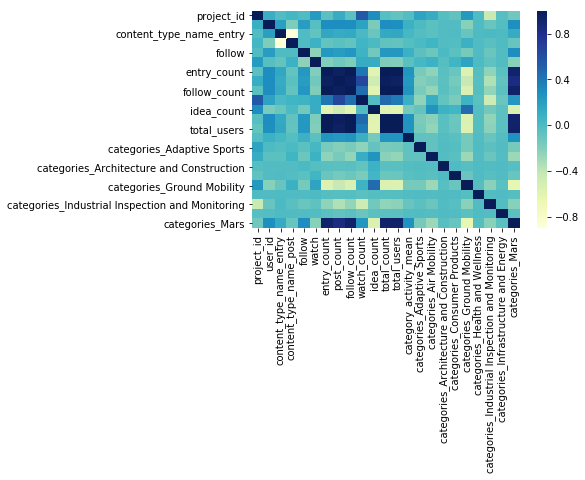

In [292]:
#plotting the correlation matrix as a heatmap for easier legibility
activity_correlation = activity_count.corr()
ax = sns.heatmap(activity_correlation, cmap="YlGnBu")

As can be seen on the heatmap of the correlation matrix the total counts of engagement metrics and the binary values of the engagement metrics are colinear so those should be dropped prior to modeling

## Modeling

In [293]:
#As shown by the plot of the correlation matrix I need to drop some feature columns to try and avoid overfitting
activity_count.drop(['content_type_name_entry', 'content_type_name_post', 'follow', 'watch'], axis='columns')

,cocreation_tool,project_id,user_id,parent_content_type_name,title,entry_count,post_count,follow_count,watch_count,idea_count,...,category_activity_mean,categories_Adaptive Sports,categories_Air Mobility,categories_Architecture and Construction,categories_Consumer Products,categories_Ground Mobility,categories_Health and Wellness,categories_Industrial Inspection and Monitoring,categories_Infrastructure and Energy,categories_Mars
0,brainstorm,155,1439,project,"Olli: self-driving, cognitive electric shuttle",0,120,7,3,14,...,27423748,0,0,0,0,1,0,0,0,0
1,brainstorm,155,1439,project,"Olli: self-driving, cognitive electric shuttle",0,120,7,3,14,...,49231224,0,0,0,0,1,0,0,0,0
2,brainstorm,155,1439,project,"Olli: self-driving, cognitive electric shuttle",0,120,7,3,14,...,4329612,0,0,0,0,1,0,0,0,0
3,brainstorm,155,1439,project,"Olli: self-driving, cognitive electric shuttle",0,120,7,3,14,...,4948096,0,0,0,0,1,0,0,0,0
4,brainstorm,155,1439,project,"Olli: self-driving, cognitive electric shuttle",0,120,7,3,14,...,19296,0,0,0,0,1,0,0,0,0
5,brainstorm,155,1439,project,"Olli: self-driving, cognitive electric shuttle",0,120,7,3,14,...,94192,0,0,0,0,1,0,0,0,0
6,brainstorm,155,1439,project,"Olli: self-driving, cognitive electric shuttle",0,120,7,3,14,...,114921,0,0,0,0,1,0,0,0,0
7,brainstorm,155,1439,project,"Olli: self-driving, cognitive electric shuttle",0,120,7,3,14,...,10816,0,0,0,0,1,0,0,0,0
8,brainstorm,155,1439,project,"Olli: self-driving, cognitive electric shuttle",0,120,7,3,14,...,546,0,0,0,0,1,0,0,0,0
9,brainstorm,155,75774,project,"Olli: self-driving, cognitive electric shuttle",0,120,7,3,14,...,27423748,0,0,0,0,1,0,0,0,0


### Trying out a Linear Regression Model with Train Test Split

Since I am only trying to predict mean activity by category I am only going to use the category columns as features

In [294]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

feature_cols = ['categories_Adaptive Sports', 'categories_Air Mobility', 'categories_Architecture and Construction', 'categories_Consumer Products', 'categories_Ground Mobility', 'categories_Health and Wellness', 'categories_Industrial Inspection and Monitoring', 'categories_Infrastructure and Energy', 'categories_Mars']
X = activity_count.loc[:, feature_cols]
y = activity_count.loc[:,'category_activity_mean']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

#Getting the MSE of the training model
print('Training model MSE:', metrics.mean_squared_error(y_train, lr.predict(X_train)))

#Getting the MSE of the testing model
print('Test model MSE:', metrics.mean_squared_error(y_test, y_pred))

#Getting the MSE of a null model
null_pred = np.zeros(len(y_test)) + y_train.mean()
print('Null model MSE:', metrics.mean_squared_error(y_test, null_pred))

Training model MSE: 4370715774996228.0
Test model MSE: 4276341366157285.0
Null model MSE: 4633470451736635.0


The test model did better than both the training and the null model but all of the MSEs are concerningly high

### Trying out a Cross Val Score Linear Regression Model

Since the train_test_split linear regression model was high I'm going to try doing a cross vsal score to see if this helps at all.

In [295]:
from sklearn.model_selection import cross_val_score

feature_cols = ['categories_Adaptive Sports', 'categories_Air Mobility', 'categories_Architecture and Construction', 'categories_Consumer Products', 'categories_Ground Mobility', 'categories_Health and Wellness', 'categories_Industrial Inspection and Monitoring', 'categories_Infrastructure and Energy', 'categories_Mars']
X = activity_count.loc[:, feature_cols]
y = activity_count.loc[:, 'category_activity_mean']

lr = LinearRegression()
np.mean(-cross_val_score(lr, X, y, cv=5, scoring='neg_mean_squared_error'))

9.949696157450484e+32

Wow that MSE is VERY bad. I'm going to try out the model I would most like to use.

### Trying out a Regression Tree Model

In [296]:
from sklearn.tree import DecisionTreeRegressor 

treereg = DecisionTreeRegressor(max_depth=3, random_state=1)

#Since the train_test_split is already defined above I'm going to use that
treereg.fit(X_train, y_train)
tree_reg_pred = treereg.predict(X_test)

metrics.mean_squared_error(y_test, tree_reg_pred)

4277976634802103.0

In [297]:
list(zip(feature_cols, treereg.feature_importances_))

[('categories_Adaptive Sports', 0.004671052420498656),
 ('categories_Air Mobility', 0.0),
 ('categories_Architecture and Construction', 0.0),
 ('categories_Consumer Products', 0.0),
 ('categories_Ground Mobility', 0.0),
 ('categories_Health and Wellness', 0.0),
 ('categories_Industrial Inspection and Monitoring', 0.011586156999076128),
 ('categories_Infrastructure and Energy', 0.0),
 ('categories_Mars', 0.9837427905804251)]

### Cross Val Score W/ Regression Tree

In [298]:
#I'm going to try tuning the regression tree and using LOOCV to lower the MSE
#First I'm going to get the MSE using just the cross val score
scores = np.mean(-cross_val_score(treereg, X,y, cv=5, scoring='neg_mean_squared_error'))
scores

4350657404988150.5

### Tuning the Regression Tree using Cross Val Score

In [299]:
max_depth_range = list(range(1,15))
MSE_scores = []

for depth in max_depth_range:
    tuned_treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    scores = np.mean(-cross_val_score(tuned_treereg, X, y, cv=5, scoring='neg_mean_squared_error'))
    MSE_scores.append(scores)

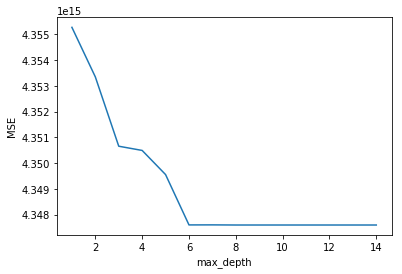

In [300]:
fig, ax = plt.subplots()
ax.plot(max_depth_range, MSE_scores)
ax.set_xlabel('max_depth')
ax.set_ylabel('MSE');

Though it shows that a max_depth of 6 is the best fit I am going to fit it with 8 because there are 8 categories

In [301]:
from sklearn.tree import DecisionTreeRegressor 

treereg = DecisionTreeRegressor(max_depth=8, random_state=99)

#Since the train_test_split is already defined above I'm going to use that
treereg.fit(X_train, y_train)
tree_reg_pred = treereg.predict(X_test)

metrics.mean_squared_error(y_test, tree_reg_pred)

4276344882915948.5

In [302]:
from sklearn.tree import export_graphviz

export_graphviz(treereg, out_file='./assets/images/activity_count1.dot', feature_names=feature_cols)

In [303]:
!dot -Tpng ./assets/images/activity_count1.dot -o activity_count1.png

![](activity_count1.png)

It looks like the top MSE still isn't getting me any better than the original simple linear regression model training set, so maybe bagging will help.

### Bagging with Decision Tree Regressor

In [304]:
from sklearn.ensemble import BaggingRegressor 

bagreg = BaggingRegressor(DecisionTreeRegressor(), n_estimators=1000, bootstrap=True, oob_score=True, random_state=99)
bagreg.fit(X_train, y_train)
bagreg_pred = bagreg.predict(X_test)
metrics.mean_squared_error(y_test, bagreg_pred)

4276371662438733.5

## Let's Remove the Outliers
When plotting the total users against the engagement metrics there were 1-3 outliers in the same spot in each out the plots. Since I am getting quite large MSEs on all the models, maybe removing those high outliers will help to lower it.

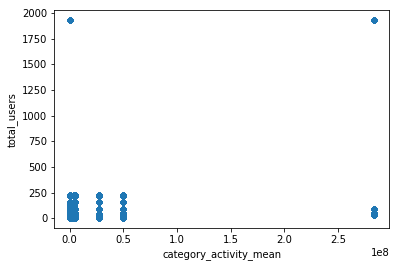

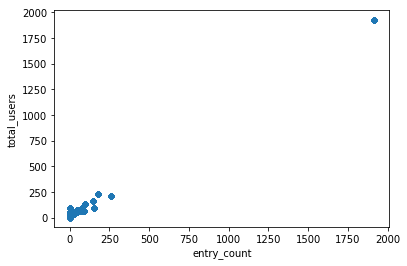

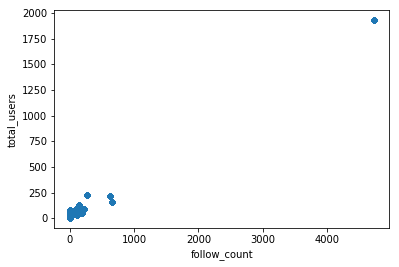

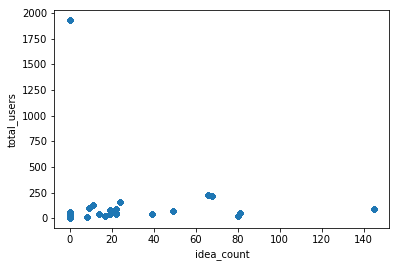

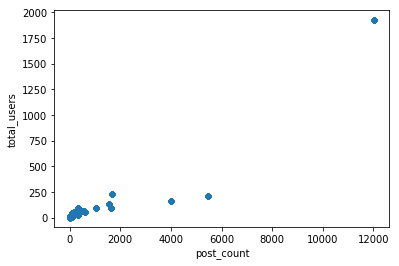

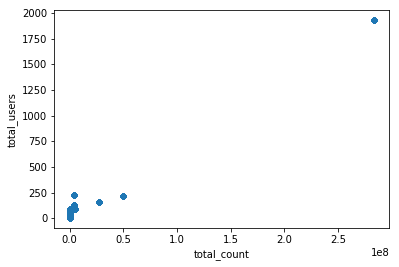

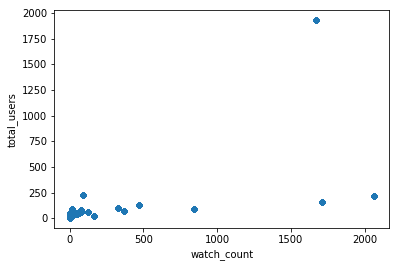

In [305]:
columns = ['category_activity_mean', 'entry_count', 'follow_count', 'idea_count', 'post_count', 'total_count', 'watch_count']

for x in columns:
    ax = activity_count.plot(kind='scatter', x=x, y='total_users')

In [306]:
activity_count.loc[activity_count.loc[:, 'total_users'] >= 1750, :].head()

,cocreation_tool,project_id,user_id,content_type_name_entry,content_type_name_post,parent_content_type_name,title,follow,watch,entry_count,...,category_activity_mean,categories_Adaptive Sports,categories_Air Mobility,categories_Architecture and Construction,categories_Consumer Products,categories_Ground Mobility,categories_Health and Wellness,categories_Industrial Inspection and Monitoring,categories_Infrastructure and Energy,categories_Mars
145012,challenge,279,93072,1,0,project,The Urbanization of Mars,1,0,1915,...,283429230,0,0,0,0,0,0,0,0,1
145013,challenge,279,93072,1,0,project,The Urbanization of Mars,1,0,1915,...,323862,0,0,0,0,0,0,0,0,1
145014,challenge,279,93072,1,0,project,The Urbanization of Mars,1,0,1915,...,135168,0,0,0,0,0,0,0,0,1
145015,challenge,279,93072,1,0,project,The Urbanization of Mars,1,0,1915,...,70870,0,0,0,0,0,0,0,0,1
145016,challenge,279,93072,1,0,project,The Urbanization of Mars,1,0,1915,...,44384,0,0,0,0,0,0,0,0,1


In [307]:
activity_count.loc[activity_count.loc[:, 'category_activity_mean'] > 250000000, :].head()

,cocreation_tool,project_id,user_id,content_type_name_entry,content_type_name_post,parent_content_type_name,title,follow,watch,entry_count,...,category_activity_mean,categories_Adaptive Sports,categories_Air Mobility,categories_Architecture and Construction,categories_Consumer Products,categories_Ground Mobility,categories_Health and Wellness,categories_Industrial Inspection and Monitoring,categories_Infrastructure and Energy,categories_Mars
27659,brainstorm,271,51599,0,0,project,Initiate Launch Sequence,0,0,0,...,283429230,0,0,0,0,0,0,0,0,1
27665,brainstorm,271,85305,0,0,project,Initiate Launch Sequence,0,0,0,...,283429230,0,0,0,0,0,0,0,0,1
27671,brainstorm,271,85367,0,0,project,Initiate Launch Sequence,1,0,0,...,283429230,0,0,0,0,0,0,0,0,1
27677,brainstorm,271,85367,0,0,project,Initiate Launch Sequence,1,0,0,...,283429230,0,0,0,0,0,0,0,0,1
27683,brainstorm,271,85367,0,0,project,Initiate Launch Sequence,1,0,0,...,283429230,0,0,0,0,0,0,0,0,1


So it looks like what is really driving everything up is all items in the `categories_Mars` category, dropping an entire category will mean I won't be able to predict activity count but it might give me a more accurate model.

In [308]:
#I'm dropping all rows that are in the Mars category
activity_count = activity_count[activity_count.loc[:, 'categories_Mars'] != 1]

In [309]:
#Now that there are no rows in the Mars category I am going to drop the `categories_Mars` column completely
activity_count.drop(['categories_Mars'], axis='columns', inplace=True)

In [311]:
activity_count.head()

,cocreation_tool,project_id,user_id,content_type_name_entry,content_type_name_post,parent_content_type_name,title,follow,watch,entry_count,...,total_users,category_activity_mean,categories_Adaptive Sports,categories_Air Mobility,categories_Architecture and Construction,categories_Consumer Products,categories_Ground Mobility,categories_Health and Wellness,categories_Industrial Inspection and Monitoring,categories_Infrastructure and Energy
0,brainstorm,155,1439,0,0,project,"Olli: self-driving, cognitive electric shuttle",0,0,0,...,42,27423748,0,0,0,0,1,0,0,0
1,brainstorm,155,1439,0,0,project,"Olli: self-driving, cognitive electric shuttle",0,0,0,...,42,49231224,0,0,0,0,1,0,0,0
2,brainstorm,155,1439,0,0,project,"Olli: self-driving, cognitive electric shuttle",0,0,0,...,42,4329612,0,0,0,0,1,0,0,0
3,brainstorm,155,1439,0,0,project,"Olli: self-driving, cognitive electric shuttle",0,0,0,...,42,4948096,0,0,0,0,1,0,0,0
4,brainstorm,155,1439,0,0,project,"Olli: self-driving, cognitive electric shuttle",0,0,0,...,42,19296,0,0,0,0,1,0,0,0


## Modeling Without the Outliers?
Let's see if I get better MSE scores without the Mars category outliers

### Trying out a Linear Regression Model with Train Test Split

In [312]:
feature_cols = ['categories_Adaptive Sports', 'categories_Air Mobility', 'categories_Architecture and Construction', 'categories_Consumer Products', 'categories_Ground Mobility', 'categories_Health and Wellness', 'categories_Industrial Inspection and Monitoring', 'categories_Infrastructure and Energy']
X = activity_count.loc[:, feature_cols]
y = activity_count.loc[:,'category_activity_mean']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

#Getting the MSE of the training model
print('Training model MSE:', metrics.mean_squared_error(y_train, lr.predict(X_train)))

#Getting the MSE of the testing model
print('Test model MSE:', metrics.mean_squared_error(y_test, y_pred))

#Getting the MSE of a null model
null_pred = np.zeros(len(y_test)) + y_train.mean()
print('Null model MSE:', metrics.mean_squared_error(y_test, null_pred))

Training model MSE: 223011431199581.4
Test model MSE: 222063551042432.66
Null model MSE: 234553939504031.4


It looks like removing the outlier category has halved the MSE, rather than going through all the models I did before I am happy with the MSE results above so I am going to jump right to the regression tree model I would like to use

### Trying out a Regression Tree Model

In [313]:
treereg = DecisionTreeRegressor(max_depth=3, random_state=1)

#Since the train_test_split is already defined above I'm going to use that
treereg.fit(X_train, y_train)
tree_reg_pred = treereg.predict(X_test)

metrics.mean_squared_error(y_test, tree_reg_pred)

222930114751736.56

### Tuning the Regression Tree using Cross Val Score

In [314]:
max_depth_range = list(range(1,15))
MSE_scores = []

for depth in max_depth_range:
    tuned_treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    scores = np.mean(-cross_val_score(tuned_treereg, X, y, cv=5, scoring='neg_mean_squared_error'))
    MSE_scores.append(scores)

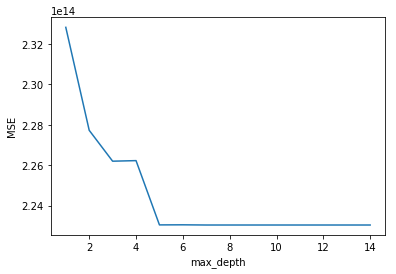

In [315]:
fig, ax = plt.subplots()
ax.plot(max_depth_range, MSE_scores)
ax.set_xlabel('max_depth')
ax.set_ylabel('MSE');

In [316]:
#Since there are 8 categories I am going to use a max_depth of 8
treereg = DecisionTreeRegressor(max_depth=8, random_state=99)

#Since the train_test_split is already defined above I'm going to use that
treereg.fit(X_train, y_train)
tree_reg_pred = treereg.predict(X_test)

metrics.mean_squared_error(y_test, tree_reg_pred)

222062762501317.06

In [317]:
#Let's take a look at the feature importances on this tuned model
list(zip(feature_cols, treereg.feature_importances_))

[('categories_Adaptive Sports', 0.2254882740702843),
 ('categories_Air Mobility', 0.0028471735751308294),
 ('categories_Architecture and Construction', 0.02059482065245463),
 ('categories_Consumer Products', 0.1465783484238671),
 ('categories_Ground Mobility', 0.0),
 ('categories_Health and Wellness', 0.009125167879008307),
 ('categories_Industrial Inspection and Monitoring', 0.5599416385456094),
 ('categories_Infrastructure and Energy', 0.03542457685364548)]

Most interesting about this feature importance is that the two oldest and least used categories are the highest importance. My guess would have been that it would be the Ground Mobility category

In [251]:
export_graphviz(treereg, out_file='./assets/images/activity_count_final3.dot', feature_names=feature_cols)

In [252]:
!dot -Tpng ./assets/images/activity_count_final3.dot -o activity_count_final3.png

![](activity_count_final3.png)

![](activity_count_final2.png)

## Data Dictionary

**cocreation_tool** - what content (brainstorm, entry, topic) the the action was taken on  
**project_id** - content id of the project in reference  
**user_id** - id of the user who took the action  
**content_type_name_entry** - binary classifier, 1 for action 'was an entry', 0 for 'was not an entry'  
**content_type_name_post** - binary classifier, 1 for action 'was a post', 0 for 'was not a post'  
  
    *note - if `content_type_name_entry` is 0 and `content_type_name_post` is 0, then the action is `idea`  
  
**parent_content_type_name** - for this sample dataset this is always 'project'  
**title** - name of the project the action and co-creation tool are within  
**categories** - the category the project is classidied as  
**follow** - binary classifier, 1 for user 'followed project', 0 for user 'did not follow project'  
**watch** - binary classifier, 1 for user 'watched' the content, 0 for user 'did not watch' the content  
**entry_count** - total number of entries on a project  
**post_count** - total number of posts on a project  
**follow_count** - total number of follows on a project  
**watch_count** - total number of watches on a project  
**idea_count** - total number of ideas on a project  
**total_count** - total number of actions (entries, posts, follows, watches and ideas) on a project  
**total_users** - total number of users on a project  
**category_activity_mean** - mean number of actions taken per category  
**categories_X** - binary classifier showing which category the action represented in that row was in

## Summary + findings

#### Hypothesis
Based on our community members and having historic knowledge of project type and activity prior to the 2.5 yr window I am using within my data, I hypothesize that the Ground Mobility category will have the highest average activity.

#### Approach + Analysis
My initial dataframe had a number of 'count' metric columns, which is shown in the dictionary above. This was done so I could plot and see correlations during EDA. It also allowed me to get the metric I was predicting for: `category_activity_mean`. As I am trying to predict engagement on a project based on the category a project is in I chose to only include the categories as my features.

#### Final Model
After reviewing the 6 different models I tried and finding that the MSE was consistant accross all models with little to no improvement, I would say that the final model I would choose to go with is a Regressor Tree model with a train test split. Though the simpler linear regression model had a very similar MSE the ability to show the decision splits with a regressor tree is why I chose to go with this model. 

#### Summary
The initial models which used all categories as binary classifiers includes the `categories_Mars` column which included the extreme outliers seen in the plots. Removing this category halved the MSE and there seems to be a much stronger signal in the data now. 